# ДЗ к уроку №2

## 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [5]:
X_st = X.copy().astype(np.float64)

for i in range(X_st.shape[0]):
    if i != 0:
        X_st[i] =  calc_std_fit(X_st[i])
        
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [7]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        #if i % (iterations / 10) == 0:
            #print(i, W, err)
    return W

In [8]:
n_lambdas = 30
#lambdas = np.logspace(-5, 1, n_lambdas)
lambdas = np.logspace(-2, 3, n_lambdas)

coefs = np.zeros((n_lambdas, X_st.shape[0]))
for i, val in enumerate(lambdas):
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-4, lambda_=val)
    coefs[i, :] = W

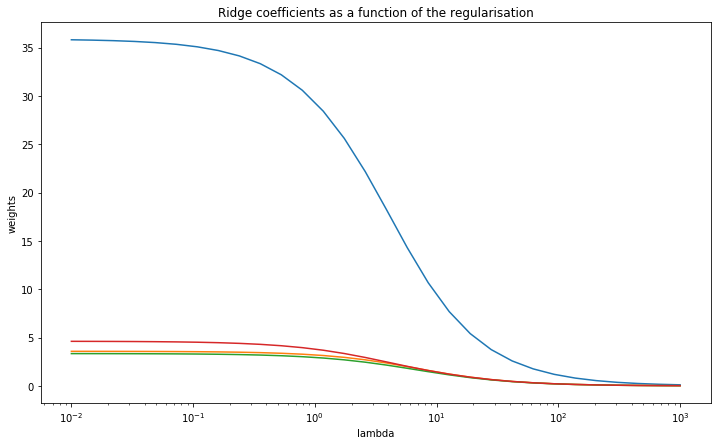

In [9]:
plt.figure(figsize=(12, 7))
ax = plt.gca()

ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')
plt.show()   

#### через встроенный Ridge?

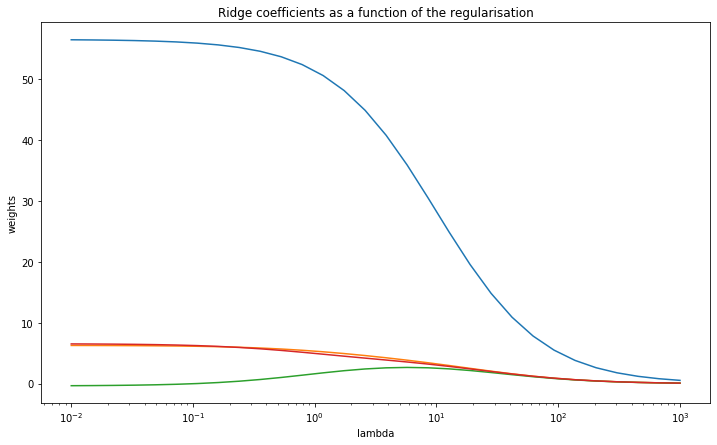

In [10]:
#n_lambdas = 200
#lambdas = np.logspace(-10, -2, n_lambdas)

n_lambdas = 30
lambdas = np.logspace(-2, 3, n_lambdas)

coefs = []
for a in lambdas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_st.T, y)
    coefs.append(ridge.coef_)


plt.figure(figsize=(12, 7))
ax = plt.gca()

ax.plot(lambdas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')
plt.show()    
    

## 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нормализация - преобразование номинальных признаков так, чтобы каждый из них лежал в диапазоне от 0 до 1. Стандартизация - обработка данных, после которой каждый признак имеет среднее 0 и дисперсию 1. Применить можно, но это не будет иметь смысла.

In [11]:
# Возьмём один признак датасета X
X_test = X[1]
X_test

array([ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2])

In [12]:
# Нормализация
x_norm = (X_test - X_test.min()) / (X_test.max() - X_test.min())
x_norm 

array([0.1, 0.1, 0.2, 0.5, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [13]:
# Стандартизация
x_stand = calc_std_fit(X_test)
x_stand 

array([-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
       -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339])

In [14]:
# К нормализованному сету применим стандартизацию 
x_norm_stand = calc_std_fit(x_norm)
x_norm_stand

array([-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,  7.07106781e-01,
       -1.96261557e-16, -1.06066017e+00,  7.07106781e-01,  2.47487373e+00,
       -7.07106781e-01, -3.53553391e-01])

In [15]:
# К стандартизованному сету применим нормализацию
x_stand_norm = (x_stand - x_stand.min()) / (x_stand.max() - x_stand.min())
x_stand_norm

array([0.1, 0.1, 0.2, 0.5, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

#### *Видно, что последовательное применение операций не имеет смысла, т.к. в итоге влияет только конечное преобразование*

## 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [16]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        
        if i % (iterations / 10) == 0:
            pass
#             print(i, W, err)
    return W

In [17]:
eval_model_reg1(X_st, y, iterations=10000)

array([48.82340296,  4.20924786,  3.84904434,  4.2101411 ])